## Loading Libraries

Let's import all the necessary packages first. You can safely ignore this section.

In [ ]:
import java.util.Random;
import java.lang.*;

In [ ]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

## Objectives

The objectives of this worksheet are as follows:


*Note:* The graph images used in this notebook were generated using the following tools:

* [csacademy](https://csacademy.com/app/graph_editor/)
* [visalgo](https://visualgo.net/en/graphds)

It is **highly** suggested to play around with this tool in order to get a visual sense of how graphs are constructed.

#### Using Jupyter
A few things to remind you with regard to using this Jupyter environment:
1. If the platform crashes don't worry. All of this is in the browser so just refresh and all of your changes up to your last save should still be there. For this reason we encourage you to **save often**.
2. Be sure to run cells from top to bottom.
3. If you're getting weird errors to go: Kernel->Restart & Clear Output. From there, run cells from top to bottom.

<h2 style="text-align: center;">Graphs in General</h2>

### Review of  General Terms

### Directed vs Undirected Graphs

### Weighted vs Unweighted Graphs

<h2 style="text-align: center;">Adjacency Matrix</h2>

We will only briefly touch upon the adjacency matrix as a means by which to represent graphs and instead spend the majority of our time discussing adjacency lists.

The adjacency matrix can simply be thought of as a 2d array of values which indicate whether two vertecies are connected by an edge. Consider the following example of an unweighted, directed graph:

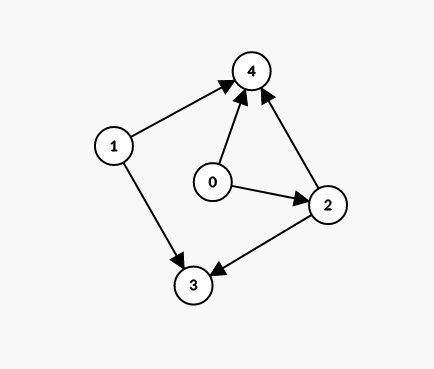




<img alt="Activity - In-Class" src="https://img.shields.io/badge/Activity-In--Class-E84A27" align="left" style="margin-right: 5px"/>
<br>
<br>

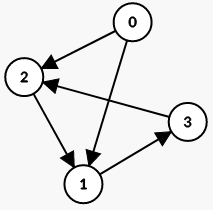
<br>
<center>
    Fig 1: A simple directed, unweighted graph
</center>
<br>
Create a function that takes an vertex list and a node list that represents a **directed, unweighted** graph (see above) and outputs it's adjacency matrix represent.

In [15]:
public void printAdjMatrix(List<Integer[]> vertexList, int vertexCount){
    
    //Step 1: Create a NxN matrix 
    int[][] matrix = new int[vertexCount][vertexCount];
    
    //Step 2: Populate the matrix
    for(Integer[] pair: vertexList){
        Integer start = pair[0];
        Integer end = pair[1];
        matrix[start][end] = 1;
    }
    
    //Step 3: Print the matrix 
    for(int r = 0; r < vertexCount; r++){
        for(int c = 0; c < vertexCount; c++){
            System.out.print(matrix[r][c]);
        }
        System.out.println();
    }
}

In [16]:
// Step 1) Setup the edge list
List<Integer []> vertList = new ArrayList<>();
vertList.add(new Integer[]{0, 2}); // This represents the edge 0->2
vertList.add(new Integer[]{0, 1}); 
vertList.add(new Integer[]{2, 1}); 
vertList.add(new Integer[]{1, 3}); 
vertList.add(new Integer[]{3, 2}); 

printAdjMatrix(vertList, 4)

0110
0001
0100
0010


If you implemented the above function correctly you should get the following output.
```
0110
0001
0100
0010
```
Spend a moment checking this against the original graph.

<h2 style="text-align: center;">Adjacency List</h2>

Let's refer back to figure 1 and compare the adjacency matrix it produced to it's adjacency list representation:

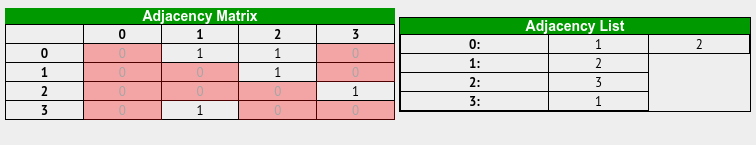

The way to read the adjacency list is to find the starting vertex in the left column. The list of vertecies that are reachable from that vertex is then given by the list that is associated with it.



Adjacency lists are a bit more versitile than adjacency matrixcies for the following reasons:
* If you want to add a new vertex to an adjacency matrix you must resize the matrix which is an expensive and annoying thing to do. With a adjacency list all you need to do is add a new node.
* For adjacency matricies we store information on every potential edge rather than just on those that exist which leads to a O(V^2) space complexity where V is the number of vertecies. With adjacency matricies we only need to store information on edges that exist in the graph so our space complexity is O(E) where E is the number of edges in the graph.

It does have the one small disadvantage that we cannot directly check or access and edge in O(1) time. Instead we must locate the entry associated with a starting node and then search along the list containing the other vertecies which it shares an edge with.

For this example, let's create a directed, weighted graph using an adjacency list!

## Edge Class

As was the case with linked lists and trees we need a basic unit in which to hold our data. We will be using an edge class to store the following two attributes:

1. The desination vertex
2. The weight of the edge



In [1]:
class Edge{
    
    private final String dest;
    private final int weight;
    
    Edge(String dest, int weight){
        this.dest = dest;
        this.weight = weight;
    }
    
    public String getDest(){
        return dest;
    }
    
    public int getWeight(){
        return weight;
    }
}

In [7]:
/* Test our edge */
Edge e1 = new Edge("a", 10);

In [8]:
System.out.println(e1.getDest());

a


In [9]:
System.out.println(e1.getWeight());

10


## DiGraph

In [26]:
class Digraph{
    
    private Map<String, List<Edge>> map;
    
    Digraph(){
        map = new HashMap<>();
    }
    
    //Digraph(List<String> vertexList, List<Edges[]> edgeList){
    //    map = new HashMap<>();
        
        /* Initialize keys */
        
        /* Initialize edges */
    //}
    
    public void addVertex(String v){
        
        map.putIfAbsent(v, new LinkedList<>());
        
    }
    
    public void addEdge(String source, String dest, int weight){
        
        map.get(source).add(new Edge(dest, weight));
    }
    
    public void removeEdge(String source, String dest){
    
        /* Step 1) Find the location of the edge with dest in source's list */
        int i = 0;
        List<Edge> edges = map.get(source);
        for(; i < edges.size(); i++){
            Edge e = edges.get(i);
            if(e.getDest().equals(dest)){
                break;
            }
        }
        
        /* Step 2) Remove the item at the location */
        map.get(source).remove(i);
    }
    
    public void printEdgeList(){
        
        for(String src: map.keySet()){
            for(Edge destEdge: map.get(src)){
                System.out.printf(" %s -> %s\n", src, destEdge.getDest());
            }
        }
    }
}

In [27]:
Digraph digraph = new Digraph();
digraph.addVertex("a");
digraph.addVertex("b");
digraph.addVertex("c");
digraph.addVertex("d");
digraph.addEdge("a", "b", 1);
digraph.addEdge("a", "c", 1);
digraph.addEdge("a", "d", 1);
digraph.removeEdge("a", "c");
digraph.printEdgeList();

 a -> b
 a -> d
